# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

In [5]:
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display 

%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("C:\\Users\\Jenny\\customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration

In [3]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples

In [4]:
indices = [183,154,181]

samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,36847,43950,20170,36534,239,47943
1,622,55,137,75,7,8
2,112151,29627,18148,16745,4948,8550


In [5]:
import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])

In [7]:
samples_bar.index = indices + ['mean']

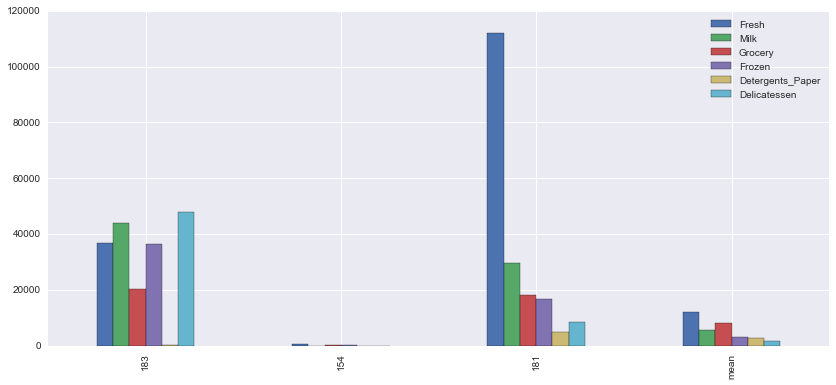

In [10]:
_=samples_bar.plot(kind ='bar',figsize=(14,6))

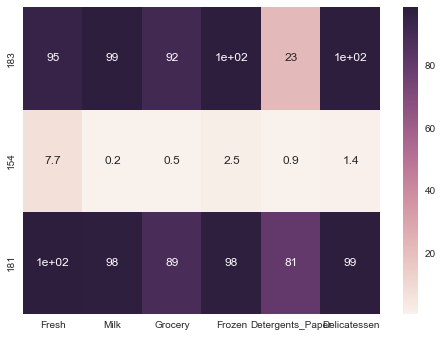

In [11]:
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
_=sns.heatmap(percentiles,vmin=1,vmax=99, annot=True)

First Sample: This first sample has a high purchase of Delicatessen goods relative to other customers in the sample. It also has a high Fresh, Milk, Grocery, and Frozen purchases. This may be a restaurant/deli that also serves other foods besides the typical deli food.

Second Sample: With the second sample, since the purchases are very, very low for all the categories compared to the mean of each category, this may be a small shop like a really small mom&pop store or this could even be a catering for a single event. 

Third Sample:The third sample seems to have above avearge and even above the 75% of the total samples for all of the categories. This customer could easily be one of the highest spending customer for the distributor. Because of the huge purchases, I'm thinking this could be a big retailer with a mini market for fresh food.


### Implementation: Feature Relevance

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

new_data = data.drop('Fresh',1)
target = data['Fresh']

X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state =0)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

score = regressor.score(X_test,y_test)
print score

-0.252469807688


In [14]:
for col in data.columns:
    new_data = data.drop(col,1)
    target = data[col]
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state =0)
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train,y_train)
    score = regressor.score(X_test,y_test)
    print 'If',col,'was the target the score would be',score

If Fresh was the target the score would be -0.252469807688
If Milk was the target the score would be 0.365725292736
If Grocery was the target the score would be 0.602801978878
If Frozen was the target the score would be 0.253973446697
If Detergents_Paper was the target the score would be 0.728655181254
If Delicatessen was the target the score would be -11.6636871594


I attempted to predict the 'Fresh' Feature which returned an r squared of -0.25. The negative R squared shows that the model fails to fit the data. Yes, this feature is necessary for identifying customers' spending habits as this feature cannot be predicted from other features. If the R squared scored close to one then that means that this feature can be predicted from other features and thus would not really give us much additional information - and if we ever need to make the dataset more manageable, this feature is a good fit for removal.

### Visualize Feature Distributions

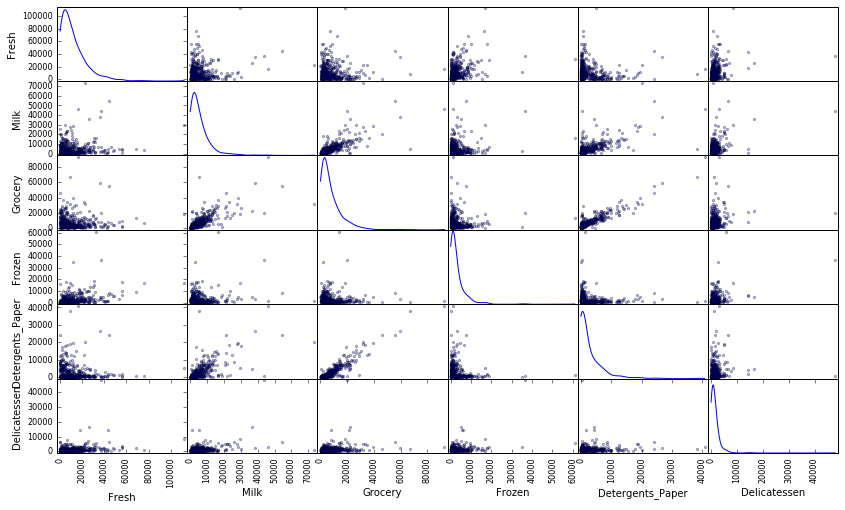

In [6]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Looking at the Fresh category, there doesnt seem to be any clear correlation with other product categories. Its distribution is unimodal distribution positively skewed - as well as all of the other categories - with data points mostly on the left side.Looking at the graph, there are pairs though that exhibit positive correlation like Grocery & Detergents_Paper and Milk & Grocery. These two pairs exhibit a degree of correlation.

## Data Preprocessing

### Implementation: Feature Scaling

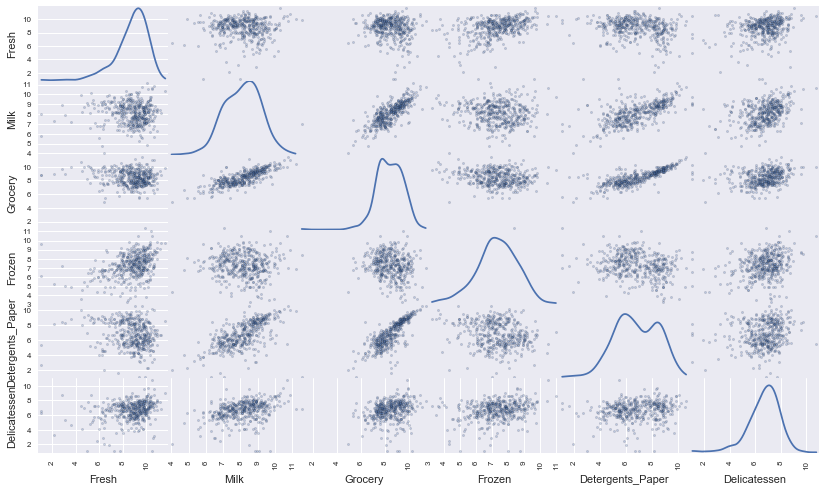

In [16]:

log_data = np.log(data)


log_samples = np.log(samples)


pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. 

In [17]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
1,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687


### Implementation: Outlier Detection

In [19]:
indices =[]
for feature in log_data.keys():
    

    Q1 = np.percentile(log_data[feature],25)
    

    Q3 = np.percentile(log_data[feature],75)
    

    step = (Q3-Q1)*1.5
    

    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    indices.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [20]:
indices

[Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
             357, 412],
            dtype='int64'),
 Int64Index([86, 98, 154, 356], dtype='int64'),
 Int64Index([75, 154], dtype='int64'),
 Int64Index([38, 57, 65, 145, 175, 264, 325, 420, 429, 439], dtype='int64'),
 Int64Index([75, 161], dtype='int64'),
 Int64Index([66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
             343],
            dtype='int64')]

In [21]:
from collections import Counter
from itertools import chain

newlist =[]
for element in indices:
    newlist.append((list(element)))

a = chain(newlist[0],newlist[1],newlist[2],newlist[3],newlist[4],newlist[5])
a = list(a)
Counter(a)

Counter({38: 1,
         57: 1,
         65: 2,
         66: 2,
         75: 2,
         81: 1,
         86: 1,
         95: 1,
         96: 1,
         98: 1,
         109: 1,
         128: 2,
         137: 1,
         142: 1,
         145: 1,
         154: 3,
         161: 1,
         171: 1,
         175: 1,
         183: 1,
         184: 1,
         187: 1,
         193: 1,
         203: 1,
         218: 1,
         233: 1,
         264: 1,
         285: 1,
         289: 1,
         304: 1,
         305: 1,
         325: 1,
         338: 1,
         343: 1,
         353: 1,
         355: 1,
         356: 1,
         357: 1,
         412: 1,
         420: 1,
         429: 1,
         439: 1})

In [22]:

outliers  = [65,66,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

There are five datapoints where more than one feature was considered an outlier based on Turkey's Method for identifying outliers and these have been removed. These were removed because these data points can potentially distort the model's output and thereby result to a less-than-reliable model. In the case of clustering, outliers could affect the location of the centroid and even possibly affect the total number of clusters one can have with the dataset.

## Feature Transformation

### Implementation: PCA

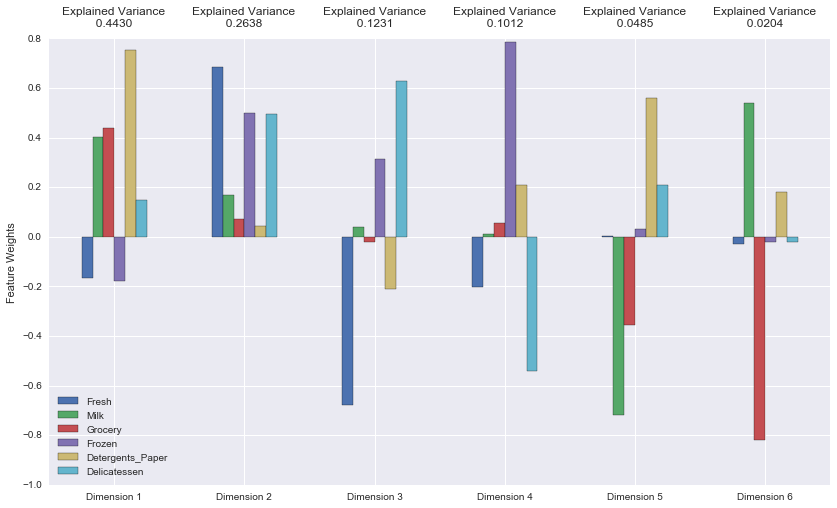

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(good_data)

pca_samples = pca.transform(log_samples)

pca_results = rs.pca_results(good_data, pca)

In [24]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


The total variance explained by the first and second principal component is 0.7068 while the first four explains 0.9311 of the variance. The first four dimensions represent 93.11% of the variance in customer spending. 

The first dimension increases with the following values - Milk, Grocery, Detergents, and Delicatessen and has a strong correlation with the Detergents variable. This suggests that these four criteria vary together, if one increases then the remaining ones increase as well. The retailer customer would score high in this first dimension.

The second dimension increases with all the variables but shows a particularly strong correlation with Fresh,Frozen and Delicatessen. Based on these high correlation, the restaurant customer would score high in this second dimension as restaurants are more likely to have high purchases for the said categories.

The third dimension shows that Frozen and Delicatessen vary together as they show positive correlation with the third principal component. I think that the restaurant customer would still score high in this dimension.

The fourth dimension correlates very strongly with Frozen. This principal component is primarily a measure of Frozen. Because of that, I would still argue that the restaurant customer would score relatively higher in this dimension.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [25]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.4232,5.2842,2.7396,-0.2364,-2.1331,-0.2452
1,-6.6170,-6.5320,-1.3364,-0.6495,0.4424,0.0146
2,2.1899,4.8605,0.0008,0.4827,-0.5041,0.1988


### Implementation: Dimensionality Reduction

In [26]:
pca = PCA(n_components=2)
pca.fit(good_data)

reduced_data = pca.transform(good_data)

pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation

In [27]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.4232,5.2842
1,-6.6170,-6.5320
2,2.1899,4.8605


## Clustering


advantages of using K-Means algorithm: scalable, less parameters to scale, useful for when there are not too many clusters and there is even cluster size, not computationally expensive. The Gaussian Mixture Model is good for density estimation and is the fastest algorithm for learning mixture models. This algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster size to have specific structures that might or might not apply. For this particular dataset, I would use the K-Means algorithm because it is simpler and less complex and plus we already have a rough idea of how many clusters there could be  - which is originally a limitation of kmeans. Kmeans because of its relative simplicity would also be faster algorithm than the Gaussian Mixture model which is one of the criteria for deciding on the better algorithm. Also, it serves as a good preliminary analysis for the data.

http://scikit-learn.org/stable/modules/mixture.html#mixture
http://scikit-learn.org/stable/modules/mixture.html#mixture

### Implementation: Creating Clusters

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters = 5,random_state=0)

preds = clusterer.fit_predict(reduced_data)

centers = clusterer.cluster_centers_

sample_preds = clusterer.predict(pca_samples)

score = silhouette_score(reduced_data,preds)
print score

0.350990778931


In [29]:
range_n_clusters = range(2,11)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, random_state=0)
    preds= clusterer.fit_predict(reduced_data)
    silhouette_avg = silhouette_score(reduced_data,preds)
    print ("For n_clusters = ", n_clusters, "The average silhouette score is", silhouette_avg) 

('For n_clusters = ', 2, 'The average silhouette score is', 0.4262810154691084)
('For n_clusters = ', 3, 'The average silhouette score is', 0.39689092644980506)
('For n_clusters = ', 4, 'The average silhouette score is', 0.33200958268202779)
('For n_clusters = ', 5, 'The average silhouette score is', 0.35099077893126523)
('For n_clusters = ', 6, 'The average silhouette score is', 0.36660898734321079)
('For n_clusters = ', 7, 'The average silhouette score is', 0.36331540384496303)
('For n_clusters = ', 8, 'The average silhouette score is', 0.35099406993457977)
('For n_clusters = ', 9, 'The average silhouette score is', 0.35414108984676229)
('For n_clusters = ', 10, 'The average silhouette score is', 0.35100374809421475)


In [30]:
clusterer = KMeans(n_clusters = 2,random_state=0)
preds = clusterer.fit_predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

2 clusters showed the best silhouette score

### Cluster Visualization

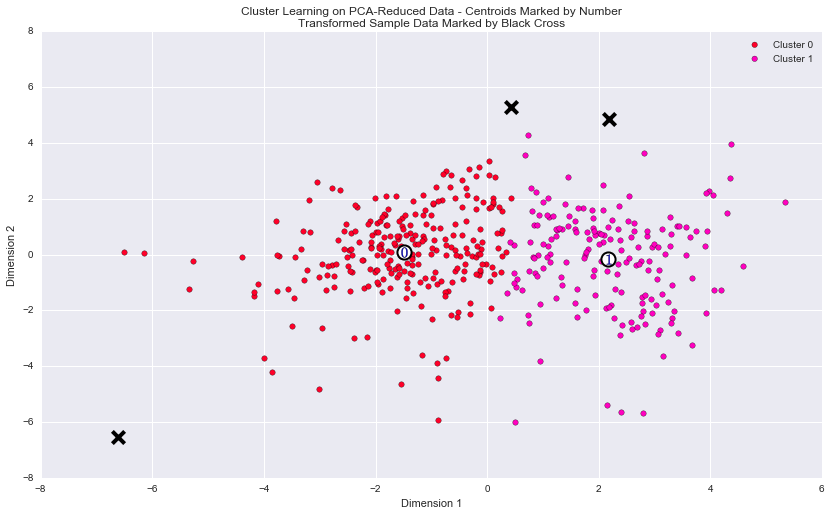

In [31]:
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery

In [32]:
log_centers = pca.inverse_transform(centers)

In [33]:
centers

array([[-1.49093664,  0.10743169],
       [ 2.17322969, -0.15659534]])

In [34]:
log_centers

array([[ 9.09003964,  7.54782167,  7.81463824,  7.6440748 ,  5.6832392 ,
         6.52398753],
       [ 8.29531921,  8.97460703,  9.401277  ,  6.858928  ,  8.42538318,
         6.94267181]])

In [35]:
true_centers = np.exp(log_centers)

In [36]:
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [37]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Segment 0 has a Fresh category above 50% of the samples, Milk category lower than 50% of the samples, Grocery - lower than 50% of the samples, Frozen - more than 50% of hte samples, Detergents_Paper -less than 50%, and Delicatessen - less than 50% of the samples. So Segment 0 purchases more for Frozen and Fresh goods


Segment 1 has a Fresh category of less than 50%of the samples, Milk category of more than 50% of the samples, Grocery higher than 50% of the samples, Frozen of lower than 50% of the sample, Detergents of higher than 50% of the sample, and Delicatessen of higher than 50% of the sample. Segment 1 purchases more for Milk, Grocery, Detergents and Delicatessen.

Customer 0 may be establishments like restaurants where they usually buy fresh and frozen goods from meat to vegetables for their customers while Segment 1 is more of a retailer that sells more grocery items.

In [41]:
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [45]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,36847,43950,20170,36534,239,47943
1,622,55,137,75,7,8
2,112151,29627,18148,16745,4948,8550


In [43]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Looking at the samples and their predicted clusters. It seems consistent. First sample basically is a huge spender with high spend for most of the categories and can easily be considered a retailer as retailers also purchase Fresh and Frozen categories. The second sample has very low purhcases across all categories and intuitively can be more of a really small retailer than a restaurant. The third sample, on the other hand, has very high purchases for Fresh relative to its purchases in ohter categories which makes it fall under the restaurant classification.

## Conclusion

Based on the two clusters identified, this new delivery service schedule would greatly affect the restaurants more (customers with higher purchases in Frozen and Fresh) than the retailers especially because the goods that they sell to their customers can be easily spoiled so they would need a shorter lead time and faster replenishment period. The delivery service sounds like it would affect everyone positively but more so the restaurants than the retailers given the nature of the goods they purchase from the wholesaler.

The company can run an A/B test to try this intuition. Version A would be the 5-day delivery service and version B would be the 3-day delivery service. The company can try these two versions for a selected group of each of the two identified clusters. Then get the change in sales/satisfaction level(whichever is the measure used by the company) from variant A to variant B for each customer segment. If the intuition is right then supposedly, the restaurant segment would react positively to variant B and this would show in terms of the measurement used.

This test could also potentially lead to new clusters if the company found a specific group in restaurant that reacted positively to B, for example. 

A supervised learner could be used to train the original customers with the features being spending amount per category and the target variable being the cluster (0 or 1). This way, when new data comes in we can run the model on the 6 product categories spend and return to us the cluster of either 0 or 1.

### Visualizing Underlying Distributions

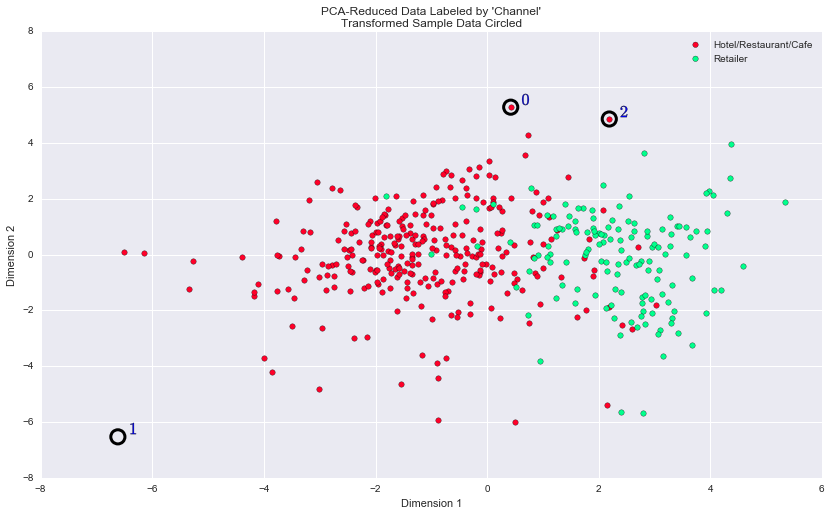

In [44]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

The graph above looks consistent with the previously generated Kmeans graph. This also shows that it is consistent with my previous definition of the customer segment. 4 out of the 5 samples are also classified to be a retailer and 1 as a restaurant. Yes, there would be segments that can be classified as purely retailers or purely Ho/Re/Ca, the farther they are from the border, the purer the differentiation becomes.